<a href="https://colab.research.google.com/github/aayushi-29/VCET-DS/blob/main/Data_Engineering(Iris).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
#pd is an Alias

#Dealing with Missing Values
#Dealing with outliers
#Converting into categorical or numerical
#Dealing with Imbalance
#Feature selection
#Dimentionality Reduction

df=pd.read_csv("Iris.csv")

#Preparing X and Y

X = df.drop('Id', axis=1)
X = X.drop('Species', axis=1)
Y = df['Species']
print(X)
print(Y)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0              5.1           3.5            1.4           0.2
1              4.9           3.0            1.4           0.2
2              4.7           3.2            1.3           0.2
3              4.6           3.1            1.5           0.2
4              5.0           3.6            1.4           0.2
..             ...           ...            ...           ...
145            6.7           3.0            5.2           2.3
146            6.3           2.5            5.0           1.9
147            6.5           3.0            5.2           2.0
148            6.2           3.4            5.4           2.3
149            5.9           3.0            5.1           1.8

[150 rows x 4 columns]
0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-

In [ ]:
# Feature Selection 1
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featuresScores = pd.concat([dfcolumns, dfscores], axis=1)
featuresScores.columns = ['Specs', 'Score']

print(featuresScores)

           Specs       Score
0  SepalLengthCm   10.817821
1   SepalWidthCm    3.594499
2  PetalLengthCm  116.169847
3   PetalWidthCm   67.244828


[0.10561662 0.05644531 0.38596074 0.45197733]


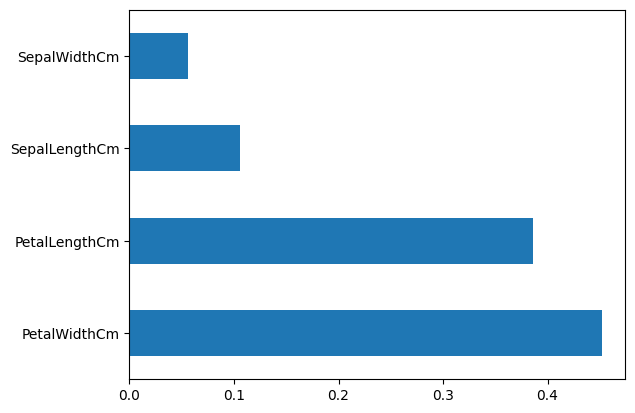

In [ ]:
#Feature Selection 2

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model = ExtraTreesClassifier()
model.fit(X,Y)
print(model.feature_importances_)

feat_importance = pd.Series(model.feature_importances_, index=X.columns)
feat_importance.nlargest(4).plot(kind='barh')
plt.show()

In [ ]:
#Numerical to Categorical

from sklearn.preprocessing import LabelEncoder


df['SepalLengthCm']=pd.cut(df['SepalLengthCm'],3,labels=['0','1','2'])
df['SepalWidthCm']=pd.cut(df['SepalWidthCm'],3,labels=['0','1','2'])
df['PetalLengthCm']=pd.cut(df['PetalLengthCm'],3,labels=['0','1','2'])
df['PetalWidthCm']=pd.cut(df['PetalWidthCm'],3,labels=['0','1','2'])

print(df)

X = df.drop('Id', axis=1)
X = X.drop('Species', axis=1)
Y = df['Species']
print(Y)
le=LabelEncoder()
le.fit(Y)
Y = le.transform(Y)
print(Y)


      Id SepalLengthCm SepalWidthCm PetalLengthCm PetalWidthCm         Species
0      1             0            1             0            0     Iris-setosa
1      2             0            1             0            0     Iris-setosa
2      3             0            1             0            0     Iris-setosa
3      4             0            1             0            0     Iris-setosa
4      5             0            1             0            0     Iris-setosa
..   ...           ...          ...           ...          ...             ...
145  146             1            1             2            2  Iris-virginica
146  147             1            0             2            2  Iris-virginica
147  148             1            1             2            2  Iris-virginica
148  149             1            1             2            2  Iris-virginica
149  150             1            1             2            2  Iris-virginica

[150 rows x 6 columns]
0         Iris-setosa
1     

In [ ]:
#Categorical to Numerical
le=LabelEncoder()
le.fit(Y)
Y = le.transform(Y)


In [ ]:
#Dealing with missing values

# 1. Use Drop (df.drop())
# 2. use Replace (df.replace("back","DOS"))
# 3. Fill NA ()

print(df.isnull().sum())
df['Item_Weight'].fillna((df['Item_Weight'].mean()/.median()/.mode()), inplace=True) #Imputing Neurimical Values

df['Outlet_Size'].fillna(('Medium'), inplace=True)  #Imputing Categorical Values

SyntaxError: invalid syntax (<ipython-input-7-6c4860a8caac>, line 8)

In [ ]:
import pandas as pd

# Sample DataFrame (you can replace this with your actual DataFrame)
# df = pd.read_csv('your_file.csv') # If reading from a CSV file

# Print the count of missing values for each column
print("Missing values count before imputation:")
print(df.isnull().sum())

# Check if 'Item_Weight' is in the DataFrame columns
if 'Item_Weight' in df.columns:
    # Imputing numerical values (choose one method: mean, median, or mode)
    # Method: Mean
    df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)
else:
    print("Column 'Item_Weight' not found in the DataFrame.")

# Similarly, check if 'Outlet_Size' exists before imputing
if 'Outlet_Size' in df.columns:
    # Imputing categorical values with a specific value, e.g., 'Medium'
    df['Outlet_Size'].fillna('Medium', inplace=True)
else:
    print("Column 'Outlet_Size' not found in the DataFrame.")

# Print the count of missing values after imputation
print("Missing values count after imputation:")
print(df.isnull().sum())

Missing values count before imputation:
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64
Column 'Item_Weight' not found in the DataFrame.
Column 'Outlet_Size' not found in the DataFrame.
Missing values count after imputation:
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [ ]:
#Oversampling and Under Sampling

#a = (df['Species'] == 'Iris-setosa').sum()
#print(a)
from collections import Counter
print(Counter(Y))
from imblearn.over_sampling import RandomOverSampler     #Random OverSampling
ros=RandomOverSampler(random_state=0)
X, Y = ros.fit_resample(X,Y)
print(Counter(Y))

from imblearn.over_sampling import SMOTE                 #Synthetic Minority Oversampling (SMOTE) oversampling
sms=SMOTE(random_state=0)
X, Y=sms.fit_resample(X,Y)

from imblearn.under_sampling import RandomUnderSampler   #Random UnderSampling
rus=RandomUnderSampler(random_state=0)
X, Y=rus.fit_resample(X,Y)


Counter({0: 50, 1: 50, 2: 50})
Counter({0: 50, 1: 50, 2: 50})


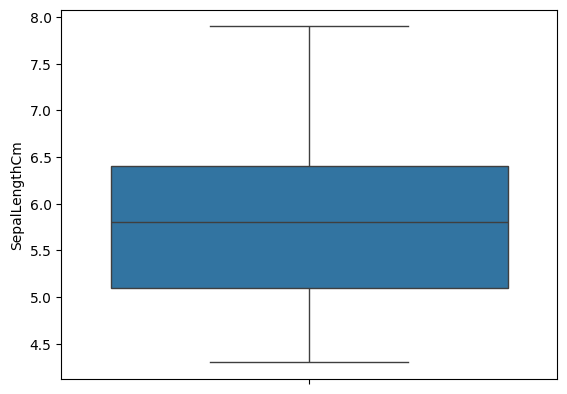

In [ ]:
#Identifying Outliers by ploting

from matplotlib import pyplot as plt
import seaborn as sns
sns.boxplot(df['SepalLengthCm'])
plt.show()

In [ ]:
#Dealing with Outliers using Interquantile Range

print(df['SepalLengthCm'])
Q1 = df['SepalLengthCm'].quantile(0.25)
Q3 = df['SepalLengthCm'].quantile(0.75)

IQR = Q3 - Q1
print(IQR)

upper = Q3 + 1.5*IQR
lower = Q1 - 1.5*IQR

print(upper)
print(lower)

out1=df[df['SepalLengthCm'] < lower].values
out2=df[df['SepalLengthCm'] > upper].values

df['SepalLengthCm'].replace(out1,lower,inplace=True)
df['SepalLengthCm'].replace(out2,upper,inplace=True)

print(df['SepalLengthCm'])

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: SepalLengthCm, Length: 150, dtype: float64
1.3000000000000007
8.350000000000001
3.1499999999999986
0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: SepalLengthCm, Length: 150, dtype: float64


In [ ]:
import pandas as pd

# Sample DataFrame (you can replace this with your actual DataFrame)
# df = pd.read_csv('your_file.csv') # If reading from a CSV file

# Ensure 'SepalLengthCm' is numeric
df['SepalLengthCm'] = pd.to_numeric(df['SepalLengthCm'], errors='coerce')

print(df['SepalLengthCm'])

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['SepalLengthCm'].quantile(0.25)
Q3 = df['SepalLengthCm'].quantile(0.75)

# Compute IQR
IQR = Q3 - Q1
print("IQR:", IQR)

# Determine upper and lower bounds for outliers
upper = Q3 + 1.5 * IQR
lower = Q1 - 1.5 * IQR

print("Upper bound:", upper)
print("Lower bound:", lower)

# Identify outliers
out1 = df['SepalLengthCm'] < lower
out2 = df['SepalLengthCm'] > upper

# Replace outliers with respective bounds
df.loc[out1, 'SepalLengthCm'] = lower
df.loc[out2, 'SepalLengthCm'] = upper

print(df['SepalLengthCm'])


0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: SepalLengthCm, Length: 150, dtype: float64
IQR: 1.3000000000000007
Upper bound: 8.350000000000001
Lower bound: 3.1499999999999986
0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: SepalLengthCm, Length: 150, dtype: float64


In [ ]:
#Principal Component Analysis

from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

logr=LogisticRegression()
pca=PCA(n_components=2)

X = df.drop('Id', axis=1)
X = X.drop('Species', axis=1)
Y = df['Species']

pca.fit(X)
X=pca.transform(X)

print(X)

X_train, X_test, y_train, y_test = train_test_split(X,Y,random_state=0,test_size=0.3)

logr.fit(X_train,y_train)

y_pred=logr.predict(X_test)
print(accuracy_score(y_test,y_pred))

[[-2.68420713  0.32660731]
 [-2.71539062 -0.16955685]
 [-2.88981954 -0.13734561]
 [-2.7464372  -0.31112432]
 [-2.72859298  0.33392456]
 [-2.27989736  0.74778271]
 [-2.82089068 -0.08210451]
 [-2.62648199  0.17040535]
 [-2.88795857 -0.57079803]
 [-2.67384469 -0.1066917 ]
 [-2.50652679  0.65193501]
 [-2.61314272  0.02152063]
 [-2.78743398 -0.22774019]
 [-3.22520045 -0.50327991]
 [-2.64354322  1.1861949 ]
 [-2.38386932  1.34475434]
 [-2.6225262   0.81808967]
 [-2.64832273  0.31913667]
 [-2.19907796  0.87924409]
 [-2.58734619  0.52047364]
 [-2.3105317   0.39786782]
 [-2.54323491  0.44003175]
 [-3.21585769  0.14161557]
 [-2.30312854  0.10552268]
 [-2.35617109 -0.03120959]
 [-2.50791723 -0.13905634]
 [-2.469056    0.13788731]
 [-2.56239095  0.37468456]
 [-2.63982127  0.31929007]
 [-2.63284791 -0.19007583]
 [-2.58846205 -0.19739308]
 [-2.41007734  0.41808001]
 [-2.64763667  0.81998263]
 [-2.59715948  1.10002193]
 [-2.67384469 -0.1066917 ]
 [-2.86699985  0.0771931 ]
 [-2.62522846  0.60680001]
 